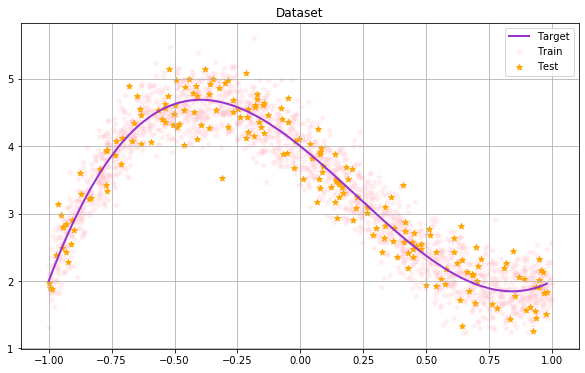

In [4]:
#libraries
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

def f(x):
    return 4-3*x-2*x**2+3*x**3

def printscore(score):
    print('*******************************************************')
    print('Model performance:')
    print('– Test loss:', score[0])
    print('– Test accuracy:', score[1])
    print('*******************************************************')
    
n_valid=200
n_train=10*n_valid
n_epochs=100
sigma=0.3

# generate training and test inputs
np.random.seed(0)

x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = f(x_valid)

y_train = np.random.normal(f(x_train), sigma) 
y_valid = np.random.normal(f(x_valid), sigma)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='pink', marker='*', alpha=0.2, label='Train')
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2')
plt.scatter(x_valid, y_valid, color='orange', marker='*', label='Test')
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


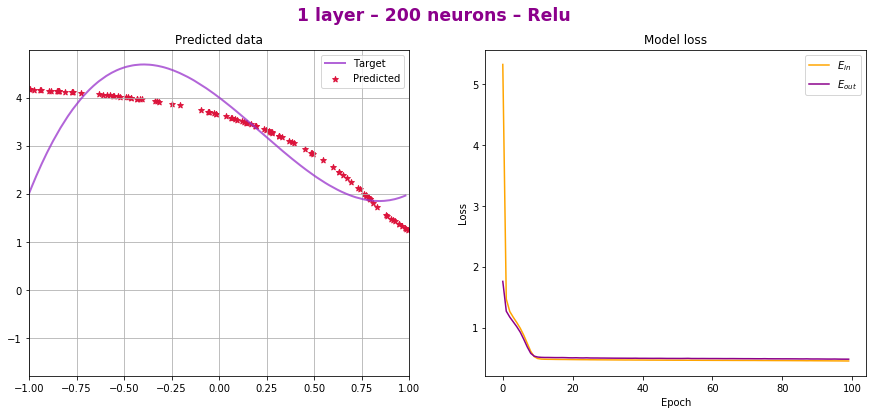

*******************************************************
Model performance:
– Test loss: 0.48185497641563413
– Test accuracy: 0.48185498
*******************************************************


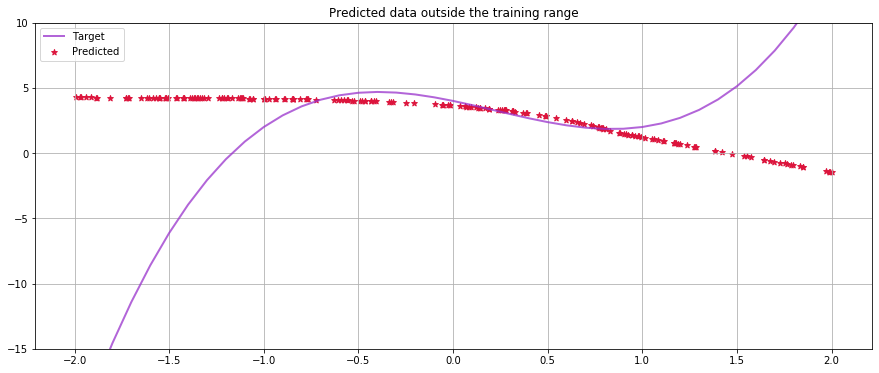

In [5]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,), activation='selu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

plt.figure(figsize=(15, 6))
plt.suptitle("1 layer – 200 neurons – Relu", size='xx-large', weight='bold', color='darkmagenta')

history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=n_epochs, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
#model.get_weights()

#predicted value
plt.subplot(121)
x_predicted = np.random.uniform(-2, 2, n_valid)
y_predicted = model.predict(x_predicted)
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*', label='Predicted')
plt.title("Predicted data")
plt.xlim(-1,1)
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='darkmagenta')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
printscore(score)

#l'out lo metto solo nell'ottimizzato
#out of the range:
plt.figure(figsize=(15, 6))
x_out=np.arange(-2, 2, 0.1)
y_out=f(x_out)
plt.plot(x_out, y_out, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*', label='Predicted')
plt.title("Predicted data outside the training range")
plt.ylim(-15,10)
plt.grid(True)
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


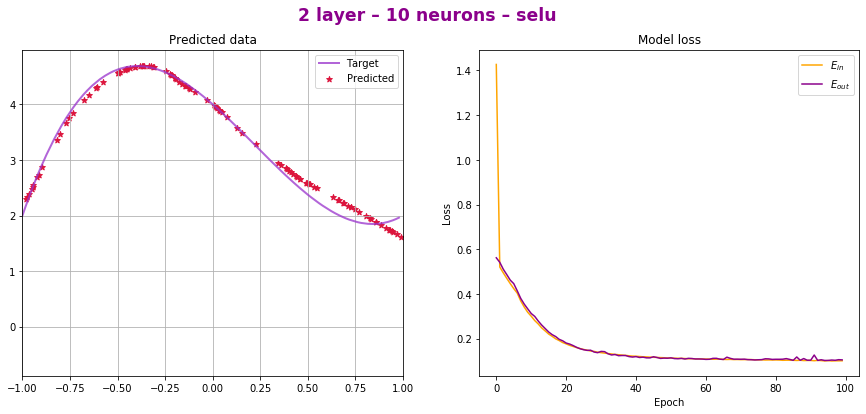

*******************************************************
Model performance:
– Test loss: 0.10527303814888
– Test accuracy: 0.10527304
*******************************************************


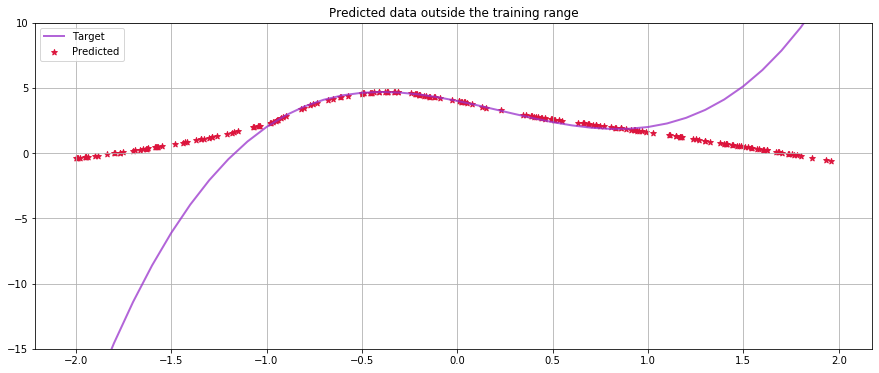

In [7]:
#qui devo trovare il numero di layers ottimale

# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='selu'))
model.add(Dense(10, activation='selu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

plt.figure(figsize=(15, 6))
plt.suptitle("2 layer – 10 neurons – selu", size='xx-large', weight='bold', color='darkmagenta')

history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=n_epochs, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
#model.get_weights()

#predicted value
plt.subplot(121)
x_predicted = np.random.uniform(-2, 2, n_valid)
y_predicted = model.predict(x_predicted)
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*', label='Predicted')
plt.title("Predicted data")
plt.xlim(-1,1)
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='darkmagenta')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
printscore(score)

#out of the range:
plt.figure(figsize=(15, 6))
x_out=np.arange(-2, 2, 0.1)
y_out=f(x_out)
plt.plot(x_out, y_out, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*', label='Predicted')
plt.title("Predicted data outside the training range")
plt.ylim(-15,10)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,))) 

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)
# return weights
optm, optb = model.get_weights()
print("Optimized m = ", optm[0][0])
print("Optimized b = ", optb[0])

# evaluate model
score1 = model.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=2)
# print performance
print()
print('"Test" loss:', score1[0])
print('"Test" accuracy:', score1[1])

print()
print('"Exact" loss:', score2[0])
print('"Exact" accuracy:', score2[1])
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['$E_{in}$', '$E_{out}$'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(10, 6))
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.scatter(x_predicted, y_predicted, color='crimson', marker='*')
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()
            plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()

In [ ]:
plt.figure(figsize=(15, 6))
n_layers=[1,2,3,5,10]
markers=["*","o","8", "s", "p", "^", "D", "X"]
colors=['deeppink','violet','darkviolet','mediumslateblue','dodgerblue','limegreen','seagreen','darkgreen','navy']

for i in range(5):
    model=load_model('Models_11-2/layers_'+str(n_layers[i]))
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, s=20, color=colors[i], marker=markers[i], label='Layers = '+str(n_layers[i]))
    x_predicted.sort()
    if (i>0):
        plt.plot(x_predicted, y_predicted, color=colors[i], alpha=0.5)
    
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(15, 6))
n_neurons=[1,5,10,20,50,100,200]

x_predicted = np.random.uniform(-1, 1, 150)

for i in range(7):
    model=load_model('Models_11-2/neurons_'+str(n_neurons[i]))
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, s=20, color=colors[i], marker=markers[i], label='Neurons = '+str(n_neurons[i]))
    x_predicted.sort()
    if (i>0):
        plt.plot(x_predicted, y_predicted, color=colors[i], alpha=0.5)
        
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2', alpha=0.75)
plt.title("Predicted data")
plt.legend()
plt.grid(True)
plt.show()